In [40]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt
import seaborn as sns

# Definição dos dados dos médicos e medicamentos
medicos = [
    'Dr. Silva', 'Dr. Santos', 'Dra. Oliveira', 'Dra. Rodrigues', 'Dr. Outlier',
    'Dr. Almeida', 'Dr. Ferreira', 'Dra. Costa', 'Dr. Lima', 'Dra. Mendez',
    'Dr. Outlier2', 'Dr. Outlier3'
]

medicamentos = ['MedA', 'MedB', 'MedC', 'MedD', 'MedE']

# Dados dos médicos: os últimos três médicos são outliers
dados = np.array([
    [1000, 1500, 2000, 3000, 10],    # Médico 1
    [1200, 1800, 2200, 2800, 15],    # Médico 2
    [900, 1400, 1900, 3100, 5],      # Médico 3
    [1100, 1600, 2100, 2900, 20],    # Médico 4
    [0, 0, 0, 0, 2000],              # Médico 5 (potencial outlier)
    [1100, 1550, 2050, 2950, 12],    # Médico 6
    [1300, 1850, 2300, 2700, 18],    # Médico 7
    [950, 1450, 1950, 3050, 8],      # Médico 8
    [1150, 1650, 2150, 2850, 22],    # Médico 9
    [10000, 12000, 13000, 14000, 3000], # Médico 10 (outlier)
    [0, 0, 0, 0, 3000],              # Médico 11 (outlier)
    [5000, 6000, 7000, 8000, 1000]   # Médico 12 (outlier)
])

df = pd.DataFrame(dados, columns=medicamentos, index=medicos)

# Exibir o DataFrame de Prescrições
print("DataFrame de Prescrições:")
print(df)


DataFrame de Prescrições:
                 MedA   MedB   MedC   MedD  MedE
Dr. Silva        1000   1500   2000   3000    10
Dr. Santos       1200   1800   2200   2800    15
Dra. Oliveira     900   1400   1900   3100     5
Dra. Rodrigues   1100   1600   2100   2900    20
Dr. Outlier         0      0      0      0  2000
Dr. Almeida      1100   1550   2050   2950    12
Dr. Ferreira     1300   1850   2300   2700    18
Dra. Costa        950   1450   1950   3050     8
Dr. Lima         1150   1650   2150   2850    22
Dra. Mendez     10000  12000  13000  14000  3000
Dr. Outlier2        0      0      0      0  3000
Dr. Outlier3     5000   6000   7000   8000  1000



<------------- RECONSTRUINDO MATRIZ COM K COMPONENTES PRINCPAIS ------------->

Valor de k escolhido: 1, explicando 97.83% da variância.
Quantidade de componentes eliminados: 11 de 12 totais.
Variância explicada eliminada: 2.17%
Espaço liberado: 48 elementos.
Espaço liberado: 0.0004 MB.


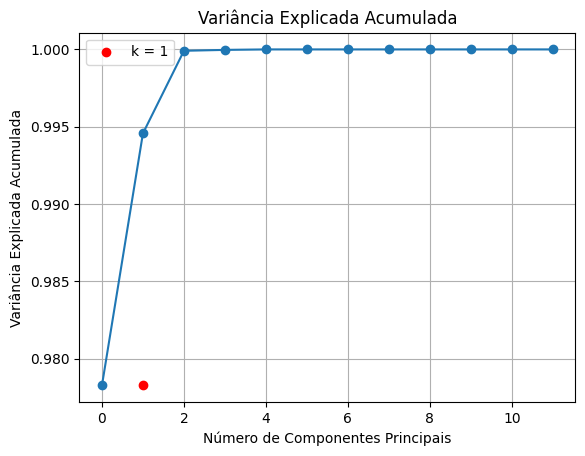


Erro de reconstrução: 4518.3771


In [41]:

print("\n<------------- RECONSTRUINDO MATRIZ COM K COMPONENTES PRINCPAIS ------------->")

U, s, Vt = linalg.svd(df.values)
s = np.append(s, np.zeros(U.shape[0] - len(s)))  # Adicionando zeros à matriz S
U_scaled = U @ np.diag(s) # Matriz U escalada pelos valores singulares

# Justificativa para o valor de k baseada na variância explicada
variancia_explicada = np.cumsum(s**2) / np.sum(s**2)
k = np.argmax(variancia_explicada >= 0.95) + 1  # Valor de k para explicar 95% da variância
print(f"\nValor de k escolhido: {k}, explicando {variancia_explicada[k-1]:.2%} da variância.")

# Quantidade de componentes eliminados
total_componentes = len(s)
componentes_removidos = total_componentes - k
print(f"Quantidade de componentes eliminados: {componentes_removidos} de {total_componentes} totais.")

# Variância explicada pelos componentes eliminados
variancia_removida = variancia_explicada[-1] - variancia_explicada[k-1]
print(f"Variância explicada eliminada: {variancia_removida:.2%}")

# Espaço liberado
tamanho_original = df.values.size  # Número total de elementos na matriz original
tamanho_reconstruido = U.shape[0] * 1 # Tamanho da matriz reconstruída (apenas 1 componente)
espaco_liberado = tamanho_original - tamanho_reconstruido
print(f"Espaço liberado: {espaco_liberado} elementos.")
# Espaço liberado em termos de memória (bytes)
espaco_liberado_memoria = espaco_liberado * np.dtype(np.float64).itemsize
print(f"Espaço liberado: {espaco_liberado_memoria / (1024 ** 2):.4f} MB.")


# Gráfico da variância explicada
plt.plot(variancia_explicada, marker='o')
plt.scatter(k, variancia_explicada[k-1], color='red', label=f'k = {k}')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Acumulada')
plt.grid(True)
plt.legend()
plt.show()

def reconstruct_matrix(U, s, Vt, k):
    return np.dot(U[:, :k], np.dot(np.diag(s[:k]), Vt[:k, :]))

# Calcular o erro de reconstrução
X_reconstructed = reconstruct_matrix(U, s, Vt, k)
reconstruction_error = np.linalg.norm(df.values - X_reconstructed, 'fro')
print(f"\nErro de reconstrução: {reconstruction_error:.4f}")


<------------------------ DETECÇÃO DE OUTLIERS ------------------------>


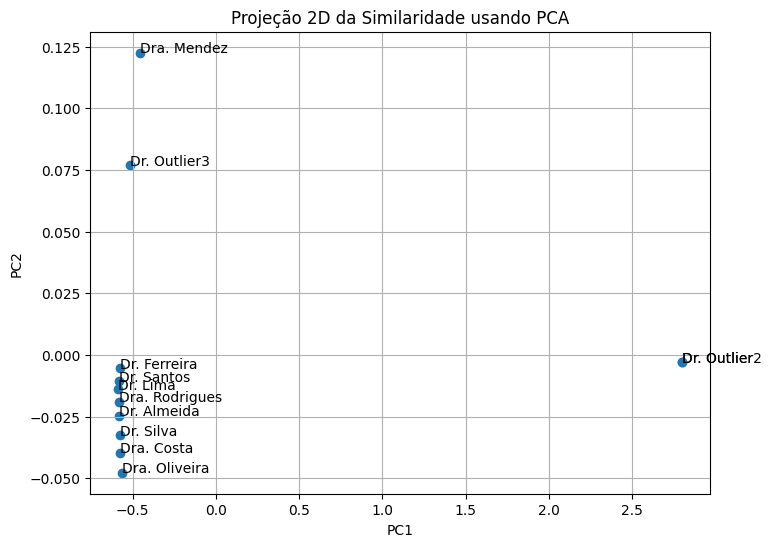


Distâncias de cosseno para cada médico:
Dr. Silva: 0.0193
Dr. Santos: 0.0095
Dra. Oliveira: 0.0278
Dra. Rodrigues: 0.0132
Dr. Outlier: 0.8711
Dr. Almeida: 0.0152
Dr. Ferreira: 0.0085
Dra. Costa: 0.0232
Dr. Lima: 0.0111
Dra. Mendez: 0.0065
Dr. Outlier2: 0.8711
Dr. Outlier3: 0.0032

Médicos detectados como outliers:
Dr. Outlier (índice 4)
Dr. Outlier2 (índice 10)


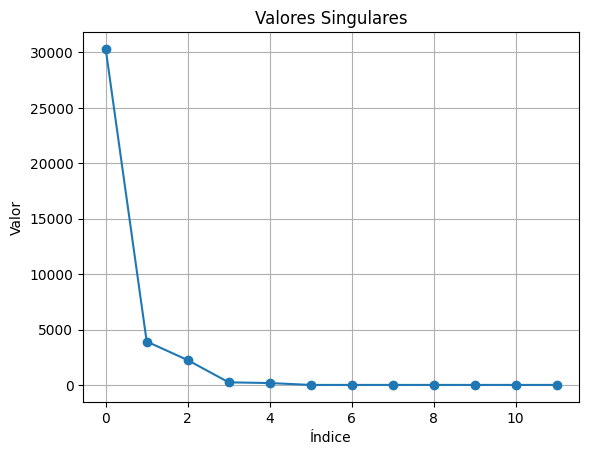

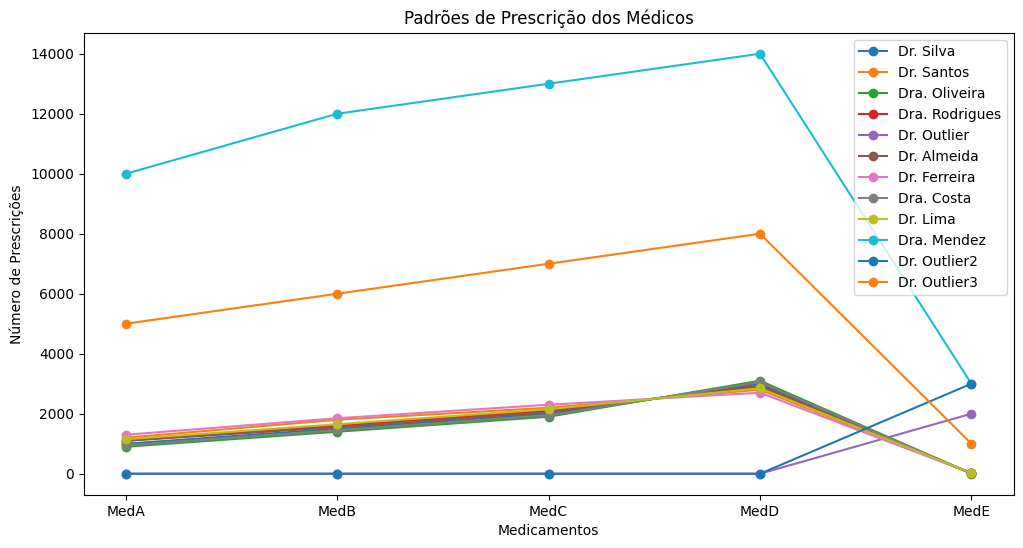


Definir um threshold para outliers (por exemplo, 1.5 vezes o desvio padrão)
A média das distâncias (np.mean(distances)) nos dá uma ideia do valor típico das distâncias de cosseno.
A desvio padrão das distâncias (np.std(distances)) mede o quanto as distâncias variam em torno da média.
O limiar é definido como a média mais 1.5 vezes o desvio padrão. Isso significa que qualquer amostra cuja 
distância de cosseno seja significativamente maior do que a maioria das amostras (mais de 1.5 desvios padrões acima da média) 
será considerada um outlier.



In [43]:

print("\n<------------------------ DETECÇÃO DE OUTLIERS ------------------------>")

# Função de distância por cosseno
def cosine_distance(a, b):
    return 1 - np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

# Calcular a similaridade por cosseno entre os médicos usando o DataFrame
similarity_matrix = np.zeros((df.shape[0], df.shape[0]))

#Poderia clusterizar aqui tbm
for i in range(df.shape[0]):
    for j in range(df.shape[0]):
        similarity_matrix[i, j] = 1 - cosine_distance(df.iloc[i].values, df.iloc[j].values)
from sklearn.decomposition import PCA
# Reduzir a dimensionalidade para 2D com PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(similarity_matrix)
# Plotar os dados em 2D
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, medico in enumerate(medicos):
    plt.text(pca_result[i, 0], pca_result[i, 1], medico)
plt.title('Projeção 2D da Similaridade usando PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Calcular distâncias de cosseno com relação ao vetor médio
#vetor médio é o vetor cujos elementos são as médias das colunas de uma matriz. 
# representa o comportamento "médio" dos médicos em termos das quantidades de medicamentos prescritos.
U, s, Vt = linalg.svd(df.values)
s = np.append(s, np.zeros(U.shape[0] - len(s)))
U_scaled = U @ np.diag(s)
mean_vector = np.mean(U_scaled, axis=0)
distances = [cosine_distance(row, mean_vector) for row in U_scaled]

# Definir threshold para detectar outliers
Z = 1.5  # Desvio padrão
threshold = np.mean(distances) + Z * np.std(distances)

# Detectar outliers com base na distância de cosseno
outliers = [i for i, dist in enumerate(distances) if dist > threshold]

print("\nDistâncias de cosseno para cada médico:")
for i, dist in enumerate(distances):
    print(f"{df.index[i]}: {dist:.4f}")

print("\nMédicos detectados como outliers:")
for i in outliers:
    print(f"{df.index[i]} (índice {i})")



# Plotar os valores singulares para justificar o threshold visualmente
plt.figure()
plt.plot(s, marker='o')
plt.title('Valores Singulares')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

# Visualizar as prescrições de cada médico
plt.figure(figsize=(12, 6))
for i, medico in enumerate(medicos):
    plt.plot(df.columns, df.iloc[i], 'o-', label=medico)
plt.title('Padrões de Prescrição dos Médicos')
plt.xlabel('Medicamentos')
plt.ylabel('Número de Prescrições')
plt.legend()
plt.show()

print("""
Definir um threshold para outliers (por exemplo, 1.5 vezes o desvio padrão)
A média das distâncias (np.mean(distances)) nos dá uma ideia do valor típico das distâncias de cosseno.
A desvio padrão das distâncias (np.std(distances)) mede o quanto as distâncias variam em torno da média.
O limiar é definido como a média mais 1.5 vezes o desvio padrão. Isso significa que qualquer amostra cuja 
distância de cosseno seja significativamente maior do que a maioria das amostras (mais de 1.5 desvios padrões acima da média) 
será considerada um outlier.
""")

# PERGUNTAS TEÓRICAS

In [39]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_20newsgroups_vectorized


data = fetch_20newsgroups_vectorized(remove=('headers', 'footers', 'quotes'))
X = data['data']
X.shape

svd = TruncatedSVD(n_components=10, random_state=42)

U_times_S = svd.fit_transform(X)
S = svd.singular_values_
Vt = svd.components_

U_times_S.shape, S.shape, Vt.shape

((11314, 10), (10,), (10, 101631))

**Exercicio** Qual o significado de:

(a) Uma linha de `U_times_S`?

(b) Uma coluna de `Vt`

(c) Uma *coluna* de `U_times_S`?

(d) Uma *linha* de `Vt`?

(e) Os valores de `S`?

(f) Como a escolha de `k`(número de componentes) afeta a interpretação e a qualidade da reconstrução dos dados?

(g) Como os valores singulares se relacionam com a variância explicada por cada componente?

(h) Qual a diferença entre os componentes principais e as variáveis originais após a SVD?

(i) Como a SVD pode ser aplicada em diferentes contextos, como recomendação de produtos ou análise de sentimentos?

(j) Como a SVD pode ser utilizada na compressão de imagens?

(k) O que são os componentes singulares e como eles são utilizados para identificar padrões nos dados?

(l) Como a normalização dos dados afeta os resultados da SVD?

(m) Quais são as limitações da SVD em relação a dados não-lineares?


**Solução**

*Linha U@S*
(a) Cada linha de U_times_S é uma versão simplificada de um dado original (por exemplo, um documento). Essa linha representa o documento em um formato mais compacto, mantendo as características principais. Podemos usar essa representação para identificar padrões, encontrar outliers ou agrupar documentos semelhantes.

*Coluna Vt*
(b) Cada coluna de Vt mostra como as variáveis originais (como palavras, se estivermos lidando com texto) se relacionam com um componente principal. Essa coluna nos diz quais variáveis são mais importantes para definir uma das direções principais dos dados. 


(c) Cada coluna de U_times_S corresponde a um dos componentes principais. Ela mostra o quanto cada dado (ou documento) está associado a esse componente específico, ajudando a entender quais dados se alinham mais com determinados padrões ou temas.

(d) Cada linha de Vt representa um componente principal. Ela nos mostra como cada variável (como palavras) contribui para formar aquele componente. Isso nos ajuda a entender o que aquele componente está capturando dos dados originais.

(e) Os valores de S indicam o quanto cada componente principal contribui para explicar a variação nos dados. Quanto maior o valor, mais importante é o componente. Esses valores mostram quais componentes capturam as maiores tendências ou padrões no conjunto de dados.

(f) A escolha do número de componentes k influencia diretamente a representação dos dados e a sua capacidade de reconstrução. Um k menor pode levar a uma interpretação mais simples e mais rápida, capturando as principais características dos dados. No entanto, pode gerar uma reconstrução de baixa qualidade, resultando em uma grande diferença entre os dados originais e os dados reconstruídos. Em contrapartida, um k muito alto pode incluir ruído, tornando a análise mais complexa. O ideal é encontrar um k que balanceie a complexidade e a precisão, muitas vezes determinado através da análise da variância explicada acumulada.

(g) Os valores singulares na matriz S estão diretamente relacionados à variância dos dados. A variância explicada por cada componente singular pode ser calculada como o quadrado do valor singular correspondente dividido pela soma total dos quadrados dos valores singulares. Portanto, componentes com valores singulares maiores explicam uma maior parte da variância nos dados. Isso ajuda a determinar a importância de cada componente na estrutura dos dados.

(h) Os componentes principais resultantes da SVD são combinações lineares das variáveis originais. Eles são obtidos a partir das matrizes U e Vt e são ortogonais entre si, o que significa que não estão correlacionados. Essa ortogonalidade ajuda a identificar padrões subjacentes nos dados. Já as variáveis originais podem ser correlacionadas e podem conter ruído e redundância. A SVD permite que os dados sejam reduzidos a suas características mais importantes (os componentes principais), tornando a análise mais eficiente e revelando relações que podem não ser visíveis nas variáveis originais.

(i) Recomendação de Produtos: Em sistemas de recomendação, a SVD pode ser usada para reduzir a dimensionalidade de matrizes de usuários e itens (como produtos). A ideia é identificar padrões nas preferências dos usuários e prever quais produtos eles podem gostar com base em seus interesses semelhantes. Ao decompor a matriz de interações em componentes principais, o sistema pode sugerir itens que não foram avaliados, mas que estão relacionados a preferências conhecidas. Na análise de sentimentos, a SVD pode ser aplicada a matrizes de frequência de palavras (por exemplo, TF-IDF) para capturar a essência de textos. A SVD ajuda a identificar temas ou tópicos subjacentes em um conjunto de documentos, permitindo a classificação de sentimentos ou a detecção de tópicos, ao mesmo tempo que reduz o ruído e a dimensionalidade dos dados.

(j) Uma imagem pode ser representada como uma matriz, onde cada elemento corresponde à intensidade de um pixel. Para compressão, apos aplicar SVD, pode-se selecionar apenas os k maiores valores singulares (valores em S) e suas correspondentes colunas em U e V.T. Assim,  imagem reconstruída ocupa significativamente menos espaço de armazenamento

(k) Os componentes singulares são os vetores que resultam da decomposição SVD e estão contidos nas matrizes U e Vt. Dessa forma, ajudam a identificar padrões ao revelar como as observações e variáveis se relacionam. As observações que se aproximam no espaço dos componentes principais indicam semelhança, enquanto as variáveis que possuem valores altos em um componente singular específico podem indicar características importantes
 
(l) A normalização (ou padronização) é importante antes de aplicar a SVD, pois assegura que todas as variáveis contribuam igualmente na decomposição. Se as variáveis tiverem escalas diferentes, as variáveis com maiores magnitudes dominarão a decomposição, resultando em componentes singulares que não refletem corretamente a estrutura subjacente dos dados. As técnicas comuns incluem a padronização (subtraindo a média e dividindo pelo desvio padrão) e a normalização min-max (escala entre 0 e 1), dependendo da natureza dos dados.

(m) Natureza Linear: A SVD é uma técnica linear, o que significa que assume que as relações entre os dados são lineares. Para dados não-lineares, outras técnicas, como t-SNE ou UMAP, são mais apropriadas, pois essas abordagens podem capturar estruturas complexas e não-lineares nos dados. Quando a SVD é aplicada a dados não-lineares, pode haver perda significativa de informações importantes, uma vez que as relações entre os dados não podem ser bem representadas em um espaço linear.

#### Conceito de componente (tema)
- As componentes principais são representações condensadas e interpretáveis das direções de variação nos dados. Elas permitem que você identifique padrões e temas de forma mais clara, resumindo a complexidade do conjunto de dados original em dimensões mais gerenciáveis e significativas.
- Um conjunto de dados possui várias componentes que indicam as direções de variações dos dados mas quando analisamos essas componentes percebemos que a maior parte delas é praticamente insignificante.
- Por isso fazemos a SVD compacta, analisando S para ver valores mais significativos e dessa forma remover todos os valores irrelevantes de U, S e Vt.

Obs: A componente da 1 linha de Vt é a mesma componente da coluna 1 de Vt

### Exemplo 1: Textos(linhas) x palavras (colunas) valor é a frequência da palavra no texto

*U @ S* -> Matriz compacta representando os textos
- Cada linha representa um texto específico 
- Cada coluna é uma componente
- O valor é quão relacionado o texto é com a componente. Isso nos mostra como cada texto contribui para formar essa componente (tema).

*Vt* -> Matriz compacta representando as palavras
- Cada coluna é referente a uma palavra específica
- Cada linha é uma componente
- O valor é quão relacionado a palavra é com a componente. Isso nos mostra como cada texto contribui para formar essa componente (tema).

*S* -> Matriz de valores singulares
- Indicam o quanto cada componente principal contribui para explicar a variação nos dados. Quanto maior o valor, mais importante é o componente. Esses valores mostram quais componentes capturam as maiores tendências ou padrões no conjunto de dados.

### Exemplo 2: Médicos (linhas) x Remédios (colunas) e os valores é quantas vezes o médico receitou o remédio

*U @ S* -> Matriz compacta representando os médicos
- Cada linha representa um médico específico 
- Cada coluna é uma componente
- O valor é quão relacionado o médico é com a componente. Isso nos mostra como cada texto contribui para formar essa componente (tema).

*Vt* -> Matriz compacta representando os remédios
- Cada coluna é referente a um remédio específico
- O valor é quão relacionado o remédio é com a componente. Isso nos mostra como cada texto contribui para formar essa componente (tema).

*S* -> Matriz de valores singulares
- Indicam o quanto cada componente principal contribui para explicar a variação nos dados. Quanto maior o valor, mais importante é o componente. Esses valores mostram quais componentes capturam as maiores tendências ou padrões no conjunto de dados.
